In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/Users/aidanwiteck/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [3]:
# This constant limits the number of rows read in from the big CSV file.
# Set to None if you want to read the whole thing
LIMIT = None

In [2]:
path = "../data/pecanstreet/15minute_data_austin/"

In [6]:
# read the 15 minute data file for California
all_data = pd.read_csv(path+"15minute_data_austin.csv",engine='python', encoding="ISO-8859-1",
                                  parse_dates=['local_15min'], index_col=['local_15min'])

In [8]:
all_data.head()

,dataid,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,bedroom2,...,sprinkler1,sumppump1,utilityroom1,venthood1,waterheater1,waterheater2,wellpump1,winecooler1,leg1v,leg2v
local_15min,,,,,,,,,,,,,,,,,,,,,
2018-11-21 15:15:00-06:00,661,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.915,124.277
2018-11-21 15:30:00-06:00,661,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.959,124.293
2018-11-21 15:45:00-06:00,661,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.886,124.240
2018-11-21 16:00:00-06:00,661,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.880,124.175
2018-11-21 16:15:00-06:00,661,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.633,124.226


In [9]:
# read in the metadata file, skip the 2nd row because it has the comments further describing the headers
metadata=pd.read_csv(path+"metadata.csv", engine='python', encoding="ISO-8859-1", skiprows=[1])

In [10]:
# filter down to our houses of interest. Active, Austin-based, has complete data, and has the grid circuit
dataids = metadata[metadata.active_record.eq('yes') &
                   metadata.city.eq('Austin') &
                   metadata.egauge_1min_data_availability.isin(['100%', '99%', '98%', '97%','96%','95%']) &
                   metadata.grid.eq('yes')]

In [11]:
# filter down to the dataids we're interested in
filt = all_data[all_data.dataid.isin(dataids.dataid)]
filt.index = pd.to_datetime(filt.index, utc=True, infer_datetime_format=True)
filt = filt.tz_convert('US/Central')

In [14]:
# Count NaN values per column
nan_counts = filt.isna().sum()

# Sort the columns by the count of non-NaN values (in descending order)
# This is done by subtracting NaN counts from the total length of the DataFrame to get non-NaN counts
sorted_columns = nan_counts.sort_values(ascending=True).index.tolist()

# Print the column names, sorted by most non-NaN values
print(sorted_columns)

['dataid', 'grid', 'leg1v', 'leg2v', 'dishwasher1', 'air1', 'furnace1', 'clotheswasher1', 'microwave1', 'refrigerator1', 'solar', 'kitchenapp1', 'oven1', 'drye1', 'kitchenapp2', 'disposal1', 'bedroom1', 'car1', 'lights_plugs2', 'lights_plugs1', 'dryg1', 'bathroom1', 'livingroom1', 'venthood1', 'office1', 'lights_plugs3', 'kitchen1', 'range1', 'sprinkler1', 'bedroom2', 'utilityroom1', 'garage1', 'furnace2', 'bedroom3', 'diningroom1', 'refrigerator2', 'airwindowunit1', 'lights_plugs4', 'oven2', 'kitchen2', 'air2', 'bathroom2', 'outsidelights_plugs1', 'winecooler1', 'waterheater2', 'waterheater1', 'freezer1', 'battery1', 'security1', 'sewerpump1', 'shed1', 'bedroom4', 'solar2', 'car2', 'sumppump1', 'aquarium1', 'wellpump1', 'bedroom5', 'circpump1', 'icemaker1', 'poolpump1', 'housefan1', 'heater3', 'air3', 'heater2', 'heater1', 'lights_plugs5', 'lights_plugs6', 'garage2', 'livingroom2', 'diningroom2', 'outsidelights_plugs2', 'clotheswasher_dryg1', 'pool1', 'pool2', 'jacuzzi1', 'pump1', 'po

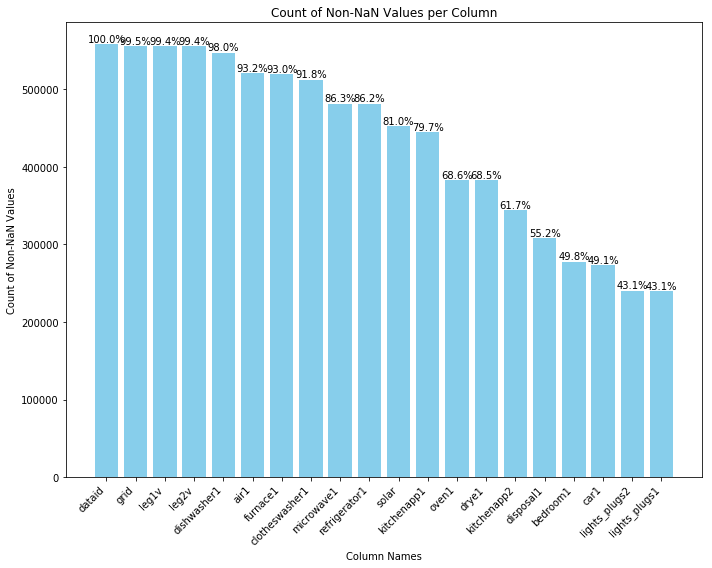

In [19]:
# Calculate the count of non-NaN values for each column
non_nan_counts = filt.count()

# Calculate total number of rows for percentage calculation
total_rows = len(filt)

# Calculate the percentage of non-NaN values for each column
percentages = (non_nan_counts / total_rows) * 100

# Sort the counts in descending order to display the column with the most non-NaN values first
sorted_counts = non_nan_counts.sort_values(ascending=False)[:20]
sorted_percentages = percentages.sort_values(ascending=False)[:20]

# Create the bar chart
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
bars = plt.bar(sorted_counts.index, sorted_counts.values, color='skyblue')

# Add percentage labels on each bar
for bar, percentage in zip(bars, sorted_percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, f'{percentage:.1f}%', ha='center', va='bottom')

# Add title and labels to make the chart informative
plt.title('Count of Non-NaN Values per Column')
plt.xlabel('Column Names')
plt.ylabel('Count of Non-NaN Values')
plt.xticks(rotation=45, ha='right')  # Rotate column names for better readability

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

In [12]:
print(filt.describe())

              dataid           air1          air2  air3  airwindowunit1  \
count  558367.000000  520621.000000  33544.000000   0.0    34736.000000   
mean     4799.416565       0.510002      0.060127   NaN        0.038220   
std      2574.876683       0.945181      0.234882   NaN        0.127828   
min       661.000000      -0.064000     -0.028000   NaN        0.000000   
25%      3039.000000       0.000000     -0.005000   NaN        0.002000   
50%      4373.000000       0.001000     -0.004000   NaN        0.022000   
75%      7719.000000       0.654000     -0.003000   NaN        0.024000   
max      9922.000000       5.208000      1.313000   NaN        1.331000   

       aquarium1      bathroom1     bathroom2       bedroom1      bedroom2  \
count        0.0  240238.000000  33448.000000  277880.000000  69575.000000   
mean         NaN       0.007982      0.001780       0.043369      0.087362   
std          NaN       0.045033      0.005174       0.060375      0.083152   
min         